In [1]:
import numpy as np
import pandas as pd
import time
import sys
import os
import h5py
from joblib import Parallel, delayed
sys.path.append('../')
from packages import actv_analysis, svm, load_csv, stats, objects, test_codes
import pickle
import re
import glob
import random
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Get the current directory
current_dir = os.getcwd()

# Go two directories up
up_two_dir = os.path.dirname(current_dir)

print(up_two_dir)

/Users/dongillee/Interference/codes


In [ ]:
net=1; relu=4; epoch=0
pkl_filename = f'{up_two_dir}/fig1/pkl/4to20/network{net}_Relu{relu}_epoch{epoch}_4to20.pkl'
with open(pkl_filename, 'rb') as f:
    units = pickle.load(f)

In [ ]:
actv_net = actv_analysis.get_actv_net(net=net, relu=4, epoch=0)

In [ ]:
units_nonzero = [units[i].id for i in range(len(units)) if units[i].no_response_subset is not True]
units_sample = random.sample(units_nonzero, 200)

In [ ]:
avg_actv_net = np.mean(actv_net, axis=2)

In [ ]:
avg_actv_net_nxs = avg_actv_net.reshape(actv_net.shape[0],10,10)[units_sample,1:,3:]

In [ ]:
aoi = np.mean(avg_actv_net_nxs,axis=0)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Assuming aoi is a 2D numpy array
aoi_normalized = scaler.fit_transform(aoi)

for i in range(7):
    sns.lineplot(x=range(aoi_normalized.shape[0]), y=aoi_normalized[:,i])

plt.show()

In [ ]:
spearman_r.shape

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from scipy import stats
import random
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

nets = np.arange(1,2)
epoch = 0
relu = 4

aois = []
spearman_results = []  # new list to store Spearman R results

for net in nets:
    pkl_filename = f'{up_two_dir}/fig1/pkl/4to20/network{net}_Relu{relu}_epoch{epoch}_4to20.pkl'
    with open(pkl_filename, 'rb') as f:
        units = pickle.load(f)
    units_nonzero = [units[i].id for i in range(len(units)) if units[i].no_response_subset is not True]
    #units_sample = random.sample(units_nonzero, 2000)

    actv_net = actv_analysis.get_actv_net(net=net, relu=4, epoch=0)
    avg_actv_net = np.mean(actv_net, axis=2)
    avg_actv_net_nxs = avg_actv_net.reshape(actv_net.shape[0],10,10)[units_nonzero,1:,3:]
    aoi = np.mean(avg_actv_net_nxs,axis=0)
    aois.append(aoi)

    # Calculate Spearman R for this net
    spearman_r = np.zeros((avg_actv_net_nxs.shape[0], avg_actv_net_nxs.shape[2]))
    for i in range(avg_actv_net_nxs.shape[0]):
        for j in range(avg_actv_net_nxs.shape[2]):
            spearman_r[i, j] = stats.spearmanr(np.arange(avg_actv_net_nxs.shape[1]), avg_actv_net_nxs[i, :, j])[0]
    # Append the results to the list
    spearman_results.append(spearman_r)

aois = np.array(aois)
spearman_results = np.array(spearman_results)  # Convert the results list to an array

# Reshape aois for MinMaxScaler
aois_reshaped = aois.reshape(-1, 1)

# Initialize a MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform aois with the scaler
aois_normalized = scaler.fit_transform(aois_reshaped)

# Reshape aois back to its original shape
aois_normalized = aois_normalized.reshape(aois.shape)

# Calculate the mean and the confidence interval
mean_aoi = np.mean(aois_normalized, axis=0)

# Calculate the mean Spearman R for each item in the third dimension
mean_spearman_r = np.mean(spearman_results, axis=0)

# Calculate the overall mean Spearman R
overall_mean_spearman_r = np.nanmean(mean_spearman_r)

# Plotting
fig, axs = plt.subplots(2, figsize=(10, 12))

# Plot mean AOI
axs[0].set_title('Mean AOI')
cmap = plt.get_cmap('rocket')
for i in range(aois_normalized.shape[2]):
    # Get a color from the colormap
    color = cmap(i/aois_normalized.shape[2])
    axs[0].plot(np.arange(aois_normalized.shape[1]), mean_aoi[:, i], color=color)

# Plot mean Spearman R as a single bar
axs[1].set_title('Mean Spearman R')
axs[1].bar(1, overall_mean_spearman_r)  # A single bar centered at x = 1
axs[1].set_xlim(0, 2)  # Optional: adjust x limits to better frame the bar

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

nets = np.arange(1,11)
epoch = 0
relu = 4

aois = []

for net in nets:
    pkl_filename = f'{up_two_dir}/fig1/pkl/4to20/network{net}_Relu{relu}_epoch{epoch}_4to20.pkl'
    with open(pkl_filename, 'rb') as f:
        units = pickle.load(f)
    units_nonzero = [units[i].id for i in range(len(units)) if units[i].no_response_subset is not True]
    units_sample = random.sample(units_nonzero, 2000)

    actv_net = actv_analysis.get_actv_net(net=net, relu=4, epoch=0)
    avg_actv_net = np.mean(actv_net, axis=2)
    avg_actv_net_nxs = avg_actv_net.reshape(actv_net.shape[0],10,10)[units_nonzero,1:,3:]
    aoi = np.mean(avg_actv_net_nxs,axis=0)
    aois.append(aoi)

aois = np.array(aois)

# Reshape aois for MinMaxScaler
aois_reshaped = aois.reshape(-1, 1)

# Initialize a MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform aois with the scaler
aois_normalized = scaler.fit_transform(aois_reshaped)

# Reshape aois back to its original shape
aois_normalized = aois_normalized.reshape(aois.shape)

# Calculate the mean and the confidence interval
mean_aoi = np.mean(aois_normalized, axis=0)

# Plotting
plt.figure(figsize=(10, 6))

# Define the colormap
cmap = plt.get_cmap('rocket')

for i in range(aois_normalized.shape[1]):
    # Get a color from the colormap
    color = cmap(i/aois_normalized.shape[1])

    sns.lineplot(x=np.arange(aois_normalized.shape[2]), y=mean_aoi[i, :], color=color)

plt.savefig(f'lineplot_tuning_curve_relu{relu}_epoch{epoch}_size_xaxis.pdf')
plt.show()

In [ ]:
net=1
relu=4
epoch=0

#net=1; relu=4; epoch=0
pkl_filename = f'{up_two_dir}/fig1/pkl/4to20/network{net}_Relu{relu}_epoch{epoch}_4to20.pkl'
with open(pkl_filename, 'rb') as f:
    units = pickle.load(f)
    
# Create a dictionary with your data
data = {
    'spearman_number': [units[i].spearmanr_number for i in range(len(units))],
    'spearman_size': [units[i].spearmanr_size for i in range(len(units))],
}

# Convert the dictionary to a DataFrame
df0 = pd.DataFrame(data).dropna()


net=1
relu=4
epoch=90

#net=1; relu=4; epoch=0
pkl_filename = f'{up_two_dir}/fig1/pkl/4to20/network{net}_Relu{relu}_epoch{epoch}_4to20.pkl'
with open(pkl_filename, 'rb') as f:
    units = pickle.load(f)
    
# Create a dictionary with your data
data = {
    'spearman_number': [units[i].spearmanr_number for i in range(len(units))],
    'spearman_size': [units[i].spearmanr_size for i in range(len(units))],
}

# Convert the dictionary to a DataFrame
df90 = pd.DataFrame(data).dropna()

In [ ]:
def compute_cumulative_proportion(df, spearman_number_value):
    # Filter dataframe
    df_filtered = df[df['spearman_number'] == spearman_number_value]

    # Sort by spearman_size
    df_sorted = df_filtered.sort_values(by='spearman_size')

    # Compute cumulative proportion
    cumulative_counts = df_sorted['spearman_size'].value_counts().sort_index().cumsum()
    df_cumulative = pd.DataFrame({
        'spearman_size': cumulative_counts.index,
        'cumulative_proportion': cumulative_counts.values / len(df_filtered)
    })
    
    return df_cumulative

# Compute cumulative proportions for both dataframes for spearman_number = -1
df0_cumulative_minus1 = compute_cumulative_proportion(df0, -1)
df90_cumulative_minus1 = compute_cumulative_proportion(df90, -1)

# Compute cumulative proportions for both dataframes for spearman_number = 1
df0_cumulative_plus1 = compute_cumulative_proportion(df0, 1)
df90_cumulative_plus1 = compute_cumulative_proportion(df90, 1)

# Plotting
plt.figure(figsize=(10,6))

# Plots for spearman_number = -1
plt.plot(df0_cumulative_minus1['spearman_size'], df0_cumulative_minus1['cumulative_proportion'], linestyle='-', label='df0 (-1)')
plt.plot(df90_cumulative_minus1['spearman_size'], df90_cumulative_minus1['cumulative_proportion'], linestyle='-', label='df90 (-1)')

# Plots for spearman_number = 1
plt.plot(df0_cumulative_plus1['spearman_size'], df0_cumulative_plus1['cumulative_proportion'], linestyle='--', label='df0 (1)')
plt.plot(df90_cumulative_plus1['spearman_size'], df90_cumulative_plus1['cumulative_proportion'], linestyle='--', label='df90 (1)')

plt.xlabel('Spearman Size')
plt.ylabel('Cumulative Proportion')
plt.title('Cumulative Proportion of Spearman Size')
plt.legend()
plt.show()


In [ ]:
def compute_cumulative_proportion_number_axis(df, spearman_size_value):
    # Filter dataframe
    df_filtered = df[df['spearman_size'] == spearman_size_value]

    # Sort by spearman_number
    df_sorted = df_filtered.sort_values(by='spearman_number')

    # Compute cumulative proportion
    cumulative_counts = df_sorted['spearman_number'].value_counts().sort_index().cumsum()
    df_cumulative = pd.DataFrame({
        'spearman_number': cumulative_counts.index,
        'cumulative_proportion': cumulative_counts.values / len(df_filtered)
    })
    
    return df_cumulative

# Compute cumulative proportions for both dataframes for spearman_size = 0
df0_cumulative_0 = compute_cumulative_proportion_number_axis(df0, -1)
df90_cumulative_0 = compute_cumulative_proportion_number_axis(df90, -1)

# Compute cumulative proportions for both dataframes for spearman_size = 1
df0_cumulative_1 = compute_cumulative_proportion_number_axis(df0, 1)
df90_cumulative_1 = compute_cumulative_proportion_number_axis(df90, 1)

# Plotting
plt.figure(figsize=(10,6))

# Plots for spearman_size = 0
plt.plot(df0_cumulative_0['spearman_number'], df0_cumulative_0['cumulative_proportion'], linestyle='-', label='df0 (0)')
plt.plot(df90_cumulative_0['spearman_number'], df90_cumulative_0['cumulative_proportion'], linestyle='-', label='df90 (0)')

# Plots for spearman_size = 1
plt.plot(df0_cumulative_1['spearman_number'], df0_cumulative_1['cumulative_proportion'], linestyle='--', label='df0 (1)')
plt.plot(df90_cumulative_1['spearman_number'], df90_cumulative_1['cumulative_proportion'], linestyle='--', label='df90 (1)')

plt.xlabel('Spearman Number')
plt.ylabel('Cumulative Proportion')
plt.title('Cumulative Proportion of Spearman Number')
plt.legend()
plt.show()

In [ ]:
df_cularea = pd.read_csv('number_size_cumulativearea.csv', index_col=0)

In [ ]:
actv_net = actv_analysis.get_actv_net(net=net, relu=4, epoch=90)

avg_actv_net = np.mean(actv_net, axis=2)
avg_actv_net_nxs = avg_actv_net.reshape(actv_net.shape[0],10,10)

## REGRESSION: log-transformed numbers and cumulative areas

In [3]:
from joblib import Parallel, delayed

def process_net_epoch(net, epoch):
    print(f"Processing for net: {net}, epoch: {epoch}")

    # Define the pkl_filename using the current net and epoch
    pkl_filename = f'{up_two_dir}/fig1/pkl/4to20/network{net}_Relu{relu}_epoch{epoch}_4to20.pkl'
    
    # Load units from the pickle file
    with open(pkl_filename, 'rb') as f:
        units = pickle.load(f)
    
    # Perform analysis
    actv_net = actv_analysis.get_actv_net(net=net, relu=4, epoch=epoch)
    avg_actv_net = np.mean(actv_net, axis=2)
    avg_actv_net_nxs = avg_actv_net.reshape(actv_net.shape[0],10,10)

    # Flatten the 3D matrix and normalize
    n_samples, nx, ny = avg_actv_net_nxs.shape
    flattened_avg_actv_nxs = avg_actv_net_nxs.reshape((n_samples, nx*ny))
    scaler_y = MinMaxScaler()
    flattened_avg_actv_nxs_normalized = scaler_y.fit_transform(flattened_avg_actv_nxs)
    avg_actv_nxs_normalized = flattened_avg_actv_nxs_normalized.reshape((n_samples, nx, ny))

    for i in range(avg_actv_net_nxs.shape[0]):
        # Assuming regression_model method returns R-squared value
        r_squared_value = units[i].regression_model(avg_actv_nxs_normalized)

    # Save the updated units back to the pickle file
    with open(pkl_filename, 'wb') as f:
        pickle.dump(units, f)

# Define the range for net and epoch
relu = 4
net_range = range(2, 11)  # from 1 to 10
epoch_range = range(0, 91, 90)  # from 0 to 90 with increments of 10

# Using Parallel with all available cores
Parallel(n_jobs=-1)(delayed(process_net_epoch)(net, epoch) for net in net_range for epoch in epoch_range)

### Organize regression coefficients

In [53]:
relus = [4]  # You can add other ReLU values if needed.
nets = range(1, 11)
epochs = [0, 90]
all_dataframes = []

for net in nets:
    for relu in relus:
        for epoch in epochs:
            pkl_filename = f'{up_two_dir}/fig1/pkl/4to20/network{net}_Relu{relu}_epoch{epoch}_4to20.pkl'
            
            # Load units from the pickle file
            with open(pkl_filename, 'rb') as f:
                units = pickle.load(f)
            
            # Extract coeff1 and coeff2 from each object into separate lists
            unit_id = [unit.id for unit in units]
            coeff1_values = [unit.coeff1 for unit in units]
            coeff2_values = [unit.coeff2 for unit in units]
            r_sqrd = [unit.r_sqrd for unit in units]

            # Create a DataFrame
            df = pd.DataFrame({
                'unit_id': unit_id,
                'coeff1': coeff1_values,
                'coeff2': coeff2_values,
                'r_sqrd': r_sqrd,
                'net': net,
                'relu': relu,
                'epoch': epoch
            })
            
            # Append the dataframe to the list
            all_dataframes.append(df)

# Concatenate all dataframes
df_coeff = pd.concat(all_dataframes, ignore_index=True)

In [40]:
df0 = df_coeff[(df_coeff['net']==1)&(df_coeff['epoch']==0)&(df_coeff['r_sqrd']>0.1)]
df90 = df_coeff[(df_coeff['net']==1)&(df_coeff['epoch']==90)&(df_coeff['r_sqrd']>0.1)]

### Plot coefficients scatterplot

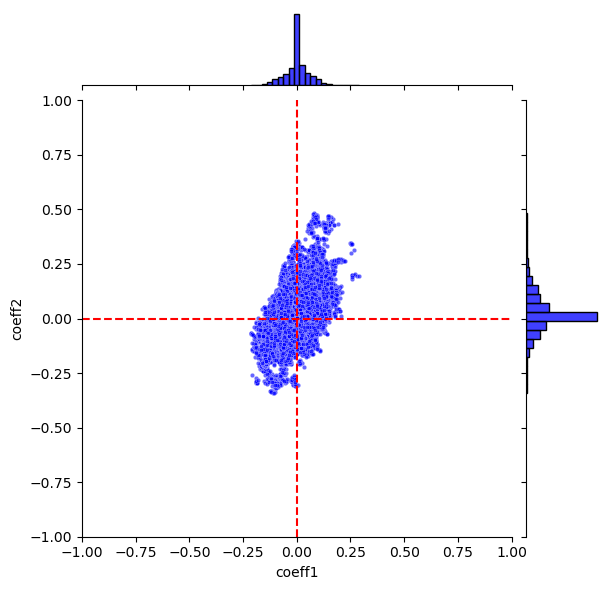

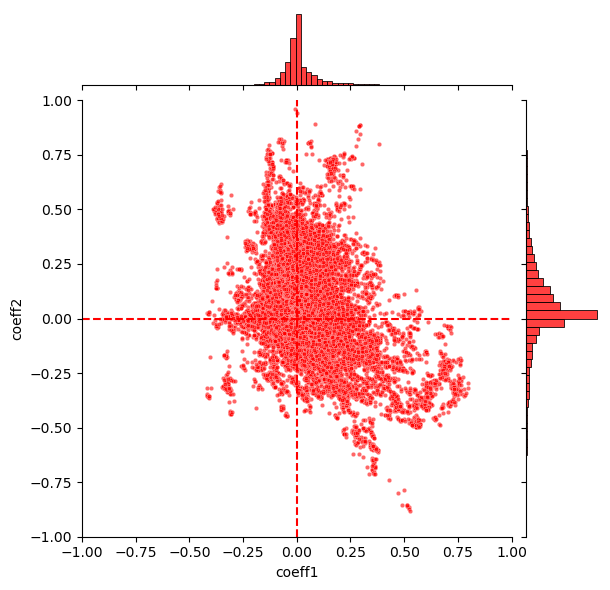

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a jointplot with scatter
plot = sns.jointplot(x='coeff1', y='coeff2', data=df0, kind='scatter', color='blue', s=10, edgecolor='w', alpha=0.6, marginal_kws=dict(bins=20, fill=True))

# Add horizontal and vertical red dotted lines along x=0 and y=0
plot.ax_joint.axhline(0, color='red', linestyle='--')
plot.ax_joint.axvline(0, color='red', linestyle='--')

# Set the x and y axis limits
plot.ax_joint.set_xlim([-1, 1])
plot.ax_joint.set_ylim([-1, 1])

# Show the plot
#plt.savefig('reg_scatterplot_net1_relu4_epoch0.pdf')
plt.show()

# Create a jointplot with scatter
plot = sns.jointplot(x='coeff1', y='coeff2', data=df90, kind='scatter', color='red', s=10, edgecolor='w', alpha=0.6, marginal_kws=dict(bins=50, fill=True))

# Add horizontal and vertical red dotted lines along x=0 and y=0
plot.ax_joint.axhline(0, color='red', linestyle='--')
plot.ax_joint.axvline(0, color='red', linestyle='--')

# Set the x and y axis limits
plot.ax_joint.set_xlim([-1, 1])
plot.ax_joint.set_ylim([-1, 1])

# Show the plot
#plt.savefig('reg_scatterplot_net1_relu4_epoch90.pdf')
plt.show()

### Plot barplot for quadrants

/var/folders/yq/vnn1qzt56k7041vctbsfrxj40000gn/T/ipykernel_78567/1331998863.py:36: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='quadrant', y='proportion', hue='epoch',


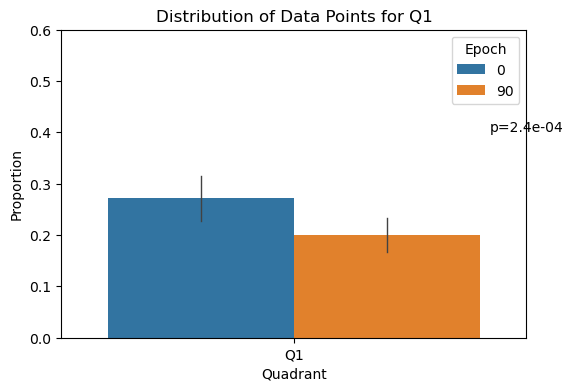

/var/folders/yq/vnn1qzt56k7041vctbsfrxj40000gn/T/ipykernel_78567/1331998863.py:36: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='quadrant', y='proportion', hue='epoch',


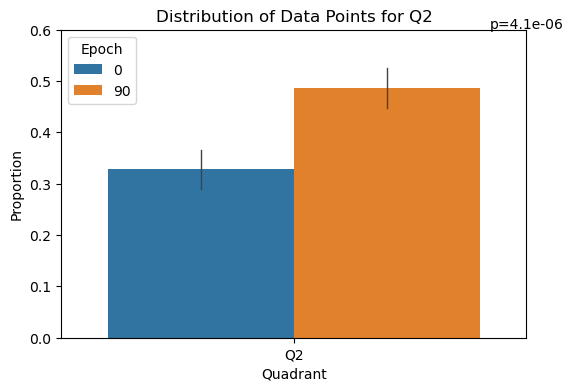

/var/folders/yq/vnn1qzt56k7041vctbsfrxj40000gn/T/ipykernel_78567/1331998863.py:36: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='quadrant', y='proportion', hue='epoch',


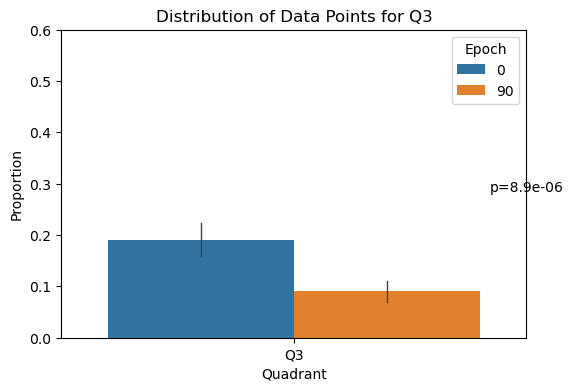

/var/folders/yq/vnn1qzt56k7041vctbsfrxj40000gn/T/ipykernel_78567/1331998863.py:36: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='quadrant', y='proportion', hue='epoch',


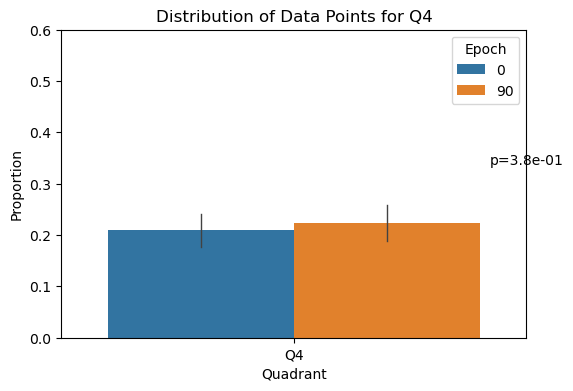

In [71]:
# Use your classification function
def classify_quadrant(row):
    if row['coeff1'] > 0 and row['coeff2'] > 0:
        return 'Q1'
    elif row['coeff1'] < 0 and row['coeff2'] > 0:
        return 'Q2'
    elif row['coeff1'] < 0 and row['coeff2'] < 0:
        return 'Q3'
    else:
        return 'Q4'

import numpy as np
from scipy.stats import ttest_rel
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

# Compute proportions for each quadrant, net, relu, and epoch combination
grouped = df_coeff.groupby(['quadrant', 'net', 'relu', 'epoch']).size().reset_index(name='count')
totals = df_coeff.groupby(['net', 'relu', 'epoch']).size().reset_index(name='total')
merged = pd.merge(grouped, totals, on=['net', 'relu', 'epoch'])
merged['proportion'] = merged['count'] / merged['total']

# Compute paired t-test values
p_values = {}
for quad in ['Q1', 'Q2', 'Q3', 'Q4']:
    epoch0_values = merged[(merged['quadrant'] == quad) & (merged['epoch'] == 0)]['proportion'].values
    epoch90_values = merged[(merged['quadrant'] == quad) & (merged['epoch'] == 90)]['proportion'].values
    _, p = ttest_rel(epoch0_values, epoch90_values)
    p_values[quad] = p

for quad in ['Q1', 'Q2', 'Q3', 'Q4']:
    plt.figure(figsize=(6, 4))
    
    sns.barplot(x='quadrant', y='proportion', hue='epoch', 
                data=merged[merged['quadrant'] == quad], ci='sd', errwidth=1)
    
    height = merged[(merged['quadrant'] == quad)]['proportion'].max() + 0.05
    plt.text(0.5, height, f'p={p_values[quad]:.1e}', ha='center')
    
    plt.title(f"Distribution of Data Points for {quad}")
    plt.ylabel("Proportion")
    plt.xlabel("Quadrant")
    plt.legend(title='Epoch')
    plt.ylim(0, 0.6)  
    
    # Saving the figure
    plt.savefig(f"Distribution_for_{quad}.pdf", dpi=300, bbox_inches='tight')
    
    plt.show()


In [3]:
from scipy.stats import kendalltau
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import pickle

# Values for x-axis (numbers from 4 to 20 with an increment of 2)
numbers = list(range(4, 21, 2))
scaler = MinMaxScaler()
relu=4

# Create an empty dataframe to store the results
results_df = pd.DataFrame(columns=['net', 'epoch', 'unit', 'size', 'tau', 'p_value'])

# Loop over desired net and epoch values
for net in range(1, 2):  # For net values from 1 to 10
    for epoch in [0]:  # For the specified epochs
        print(f"Processing for net: {net}, epoch: {epoch}")
        # Define the pkl_filename using the current net and epoch
        
        actv_net = actv_analysis.get_actv_net(net=net, relu=4, epoch=epoch)
        avg_actv_net_nxs = np.mean(actv_net, axis=2).reshape(actv_net.shape[0], 10, 10)[:, 1:, 3:]
        
        pkl_filename = f'{up_two_dir}/fig1/pkl/4to20/network{net}_Relu{relu}_epoch{epoch}_4to20.pkl'

        # Load units from the pickle file
        with open(pkl_filename, 'rb') as f:
            units = pickle.load(f)

        # Process each matrix in avg_actv_net_nxs_Q4
        for unit_index, unit in enumerate(units):
            # Extract the matrix for the current index
            matrix = avg_actv_net_nxs[unit_index]

            # Apply Min-Max normalization to the matrix
            matrix_normalized = scaler.fit_transform(matrix.reshape(-1, 1)).reshape(matrix.shape)

            # Convert the normalized matrix to a dataframe
            df = pd.DataFrame(matrix_normalized, columns=['size_' + str(i) for i in range(1, 8)])
            df['numbers'] = numbers

            # Dictionary to store tau and p_value for each size
            stats_dict = {}

            temp_list = []

            # Compute Kendall's tau
            for size in df.columns[:-1]:  # exclude the 'numbers' column
                tau, p_value = kendalltau(numbers, df[size])

                temp_list.append({
                    'net': net,
                    'epoch': epoch,
                    'unit': unit_index,
                    'size': size,
                    'tau': tau,
                    'p_value': p_value
                })

                # Store the results in the dictionary
                stats_dict[size] = {'tau': tau, 'p_value': p_value}

            # Update the unit object with the stats dictionary
            setattr(unit, 'kendall_stats', stats_dict)

            # Concatenate temporary results to the main results dataframe
            results_df = pd.concat([results_df, pd.DataFrame(temp_list)], ignore_index=True)

        # Save the updated units back to the pickle file
        with open(pkl_filename, 'wb') as f:
            pickle.dump(units, f)

# You can inspect results_df for a summary of all tau and p_value calculations across all units
print(results_df)

Processing for net: 1, epoch: 0
--- 105.61257791519165 seconds ---
       net epoch   unit    size       tau   p_value
0        1     0      0  size_1 -0.666667  0.012665
1        1     0      0  size_2 -0.444444  0.119439
2        1     0      0  size_3 -0.611111  0.024741
3        1     0      0  size_4 -0.611111  0.024741
4        1     0      0  size_5 -0.555556  0.044615
...     ..   ...    ...     ...       ...       ...
454267   1     0  64895  size_3       NaN       NaN
454268   1     0  64895  size_4       NaN       NaN
454269   1     0  64895  size_5       NaN       NaN
454270   1     0  64895  size_6       NaN       NaN
454271   1     0  64895  size_7       NaN       NaN

[454272 rows x 6 columns]


In [4]:
pkl_filename = f'{up_two_dir}/fig1/pkl/4to20/network{net}_Relu{relu}_epoch{epoch}_4to20.pkl'

# Load units from the pickle file
with open(pkl_filename, 'rb') as f:
    units = pickle.load(f)

In [43]:
df0_Q1 = df0[(df0['coeff1']>0)&(df0['coeff2']>0)]['unit_id']
df0_Q2 = df0[(df0['coeff1']<0)&(df0['coeff2']>0)]['unit_id']
df0_Q3 = df0[(df0['coeff1']<0)&(df0['coeff2']<0)]['unit_id']
df0_Q4 = df0[(df0['coeff1']>0)&(df0['coeff2']<0)]['unit_id']

df90_Q1 = df90[(df90['coeff1']>0)&(df90['coeff2']>0)]['unit_id']
df90_Q2 = df90[(df90['coeff1']<0)&(df90['coeff2']>0)]['unit_id']
df90_Q3 = df90[(df90['coeff1']<0)&(df90['coeff2']<0)]['unit_id']
df90_Q4 = df90[(df90['coeff1']>0)&(df90['coeff2']<0)]['unit_id']

df90_sp = df90[(df90['coeff1']>0)&(df90['coeff2']<0)&(df90['coeff2']>-0.1)]['unit_id']

In [33]:
actv_net = actv_analysis.get_actv_net(net=net, relu=4, epoch=90)

--- 95.89007878303528 seconds ---


In [50]:
avg_actv_net = np.mean(actv_net, axis=2)
avg_actv_net_nxs = np.mean(avg_actv_net.reshape(actv_net.shape[0],10,10)[df90_Q4,1:,3:], axis=0)

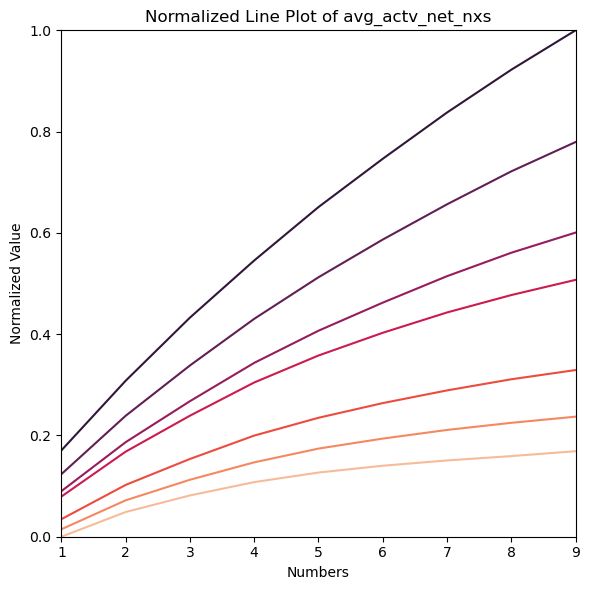

In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the matrix to a dataframe
df = pd.DataFrame(avg_actv_net_nxs)

# Reset columns to sizes and index to numbers
sizes = ['size_' + str(i) for i in range(1, 8)]
numbers = list(range(1, 10))
df.columns = sizes
df['numbers'] = numbers

# Melt the dataframe to a long format
df_melted = df.melt(id_vars=['numbers'], value_vars=sizes, var_name='size', value_name='value')

# Normalize the 'value' column
scaler = MinMaxScaler()
df_melted['value'] = scaler.fit_transform(df_melted[['value']])

# Plotting
plt.figure(figsize=(6, 6))  # Making the figure square

# Using 'rocket' colormap
colors = sns.color_palette("rocket", n_colors=len(sizes))
sns.lineplot(data=df_melted, x='numbers', y='value', hue='size', palette=colors, legend=False)

plt.title('Normalized Line Plot of avg_actv_net_nxs')
plt.xlabel('Numbers')
plt.ylabel('Normalized Value')

plt.xlim(1, len(numbers))  # Set x limits based on number range
plt.ylim(0, 1)  # Since we normalized, y range will be between 0 and 1

plt.tight_layout()  # Adjust plot layout for better appearance
plt.savefig('epoch90_4th_quadrant_tuning_curve.pdf')
plt.show()

## Plotting individual units

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Values for x-axis (numbers from 4 to 20 with an increment of 2)
numbers = list(range(4, 21, 2))
scaler = MinMaxScaler()
avg_actv_net_nxs = np.mean(actv_net, axis=2).reshape(actv_net.shape[0],10,10)[:,1:,3:]

# Iterate over each matrix in avg_actv_net_nxs_Q4
for index in df90_Q4:
    
    # Extract the matrix for the current index
    matrix = avg_actv_net_nxs[index]
    
    # Apply Min-Max normalization to the matrix
    matrix_normalized = scaler.fit_transform(matrix.reshape(-1, 1)).reshape(matrix.shape)

    # Convert the normalized matrix to a dataframe
    df = pd.DataFrame(matrix_normalized, columns=['size_' + str(i) for i in range(1, 8)])
    df['numbers'] = numbers

    # Melt the dataframe to a long format
    df_melted = df.melt(id_vars=['numbers'], value_vars=['size_' + str(i) for i in range(1, 8)], var_name='size', value_name='value')

    # Plotting
    plt.figure(figsize=(8, 8))
    
    # Using 'rocket' colormap
    colors = sns.color_palette("rocket", n_colors=7)
    sns.lineplot(data=df_melted, x='numbers', y='value', hue='size', palette=colors, linewidth=2.5)
    
    # Add annotation for coeff1 and coeff2
    coeff1 = df90.loc[index, 'coeff1']
    coeff2 = df90.loc[index, 'coeff2']
    plt.annotate(f'coeff1: {coeff1:.6f}\ncoeff2: {coeff2:.6f}', xy=(0.05, 0.9), xycoords='axes fraction', fontsize=10, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
    
    plt.title(f'Normalized Line Plot for Index: {index}')
    plt.xlabel('Numbers')
    plt.ylabel('Normalized Value')
    plt.legend().remove()  # Remove legend for clarity

    # Save the figure
    plt.savefig(f'normalized_line_plot_index_{index}.pdf')
    plt.close()  # Close the figure to free up memory

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Values for x-axis (numbers from 4 to 20 with an increment of 2)
numbers = list(range(4, 21, 2))
avg_actv_net_nxs = np.mean(actv_net, axis=2).reshape(actv_net.shape[0], 10, 10)[:, 1:, 3:]

# Iterate over each matrix in avg_actv_net_nxs_Q4
for index in filtered_df.index:
    
    # Extract the matrix for the current index
    matrix = avg_actv_net_nxs[index]
    
    # Convert the matrix to a dataframe
    df = pd.DataFrame(matrix, columns=['size_' + str(i) for i in range(1, 8)])
    df['numbers'] = numbers

    # Melt the dataframe to a long format
    df_melted = df.melt(id_vars=['numbers'], value_vars=['size_' + str(i) for i in range(1, 8)], var_name='size', value_name='value')

    # Plotting
    plt.figure(figsize=(8, 8))
    
    # Using 'rocket' colormap
    colors = sns.color_palette("rocket", n_colors=7)
    sns.lineplot(data=df_melted, x='numbers', y='value', hue='size', palette=colors, linewidth=2.5)
    
    # Add annotation for coeff1 and coeff2
    coeff1 = df90.loc[index, 'coeff1']
    coeff2 = df90.loc[index, 'coeff2']
    plt.annotate(f'coeff1: {coeff1:.6f}\ncoeff2: {coeff2:.6f}', xy=(0.05, 0.9), xycoords='axes fraction', fontsize=10, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
    
    plt.title(f'Line Plot for Index: {index}')
    plt.xlabel('Numbers')
    plt.ylabel('Value')
    plt.legend().remove()  # Remove legend for clarity

    # Save the figure
    plt.savefig(f'line_plot_index_{index}_number_units.pdf')
    plt.close()  # Close the figure to free up memory

In [ ]:
anova_numbers = [units[i].anova2_numbers for i in df90.index]
anova_sizes = [units[i].anova2_sizes for i in df90.index]
anova_int = [units[i].anova2_ns_int for i in df90.index]

In [ ]:
anova = pd.DataFrame({'numbers':anova_numbers, 'sizes':anova_sizes, 'int':anova_int}, index=df90.index)

In [ ]:
units[170].anova2_ns_int

In [ ]:
filtered_df = anova[(anova['numbers'] < 0.05) & (anova['sizes'] > 0.05) & (anova['int'] > 0.05)]

In [7]:
units[67].kendall_stats

{'size_1': {'tau': -1.0, 'p_value': 5.5114638447971785e-06},
 'size_2': {'tau': -0.8888888888888888, 'p_value': 0.00024250440917107584},
 'size_3': {'tau': -0.8888888888888888, 'p_value': 0.00024250440917107584},
 'size_4': {'tau': -0.7777777777777778, 'p_value': 0.0024250440917107582},
 'size_5': {'tau': -0.7777777777777778, 'p_value': 0.0024250440917107582},
 'size_6': {'tau': -0.7222222222222222, 'p_value': 0.0058862433862433864},
 'size_7': {'tau': -0.7222222222222222, 'p_value': 0.0058862433862433864}}